In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

spotify_file = "songs_normalize.csv"

songs_df = pd.read_csv(spotify_file)
songs_df.head(10)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.30000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.01030,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.17300,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.02630,0.000014,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.04080,0.001040,0.0845,0.879,172.656,pop
5,Sisqo,Thong Song,253733,True,1999,69,0.706,0.888,2,-6.959,1,0.0654,0.11900,0.000096,0.0700,0.714,121.549,"hip hop, pop, R&B"
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop
7,Robbie Williams,Rock DJ,258560,False,2000,68,0.708,0.772,7,-4.264,1,0.0322,0.02670,0.000000,0.4670,0.861,103.035,"pop, rock"
8,Destiny's Child,Say My Name,271333,False,1999,75,0.713,0.678,5,-3.525,0,0.1020,0.27300,0.000000,0.1490,0.734,138.009,"pop, R&B"
9,Modjo,Lady - Hear Me Tonight,307153,False,2001,77,0.720,0.808,6,-5.627,1,0.0379,0.00793,0.029300,0.0634,0.869,126.041,Dance/Electronic


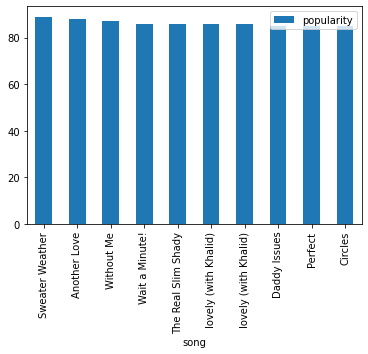

In [38]:
# # plot the top 10 songs by popularity
songs_df.sort_values("popularity", ascending=False).head(10).plot(kind="bar", x="song", y="popularity")

In [39]:
# find the top 10 least popular songs
least_popular_songs = songs_df.sort_values("popularity").head(10)

# add the columns for artist and danceability
least_popular_songs = least_popular_songs[["song", "artist", "danceability"]]

# print the data frame
print(least_popular_songs)

                              song                  artist  danceability
860                  Touch My Body            Mariah Carey         0.715
1626                           Sex             Cheat Codes         0.510
1617                 Hurts So Good                Astrid S         0.672
778                    We Fly High               Jim Jones         0.685
1750                          DNA.          Kendrick Lamar         0.636
1751  Drowning (feat. Kodak Black)  A Boogie Wit da Hoodie         0.839
1922                      Mad Love                   Mabel         0.631
1602                 Love Yourself           Justin Bieber         0.609
1600                       Starboy              The Weeknd         0.681
835                  See You Again             Miley Cyrus         0.692


In [40]:
# plot a bar plot for each top artist
for artist in top_artists.index:
    artist_df = songs_df[songs_df["artist"] == artist]
    artist_df.plot(kind="bar", x="song", y="popularity")
    plt.title(artist, fontsize=20)
    plt.xlabel("Song", fontsize=16)
    plt.ylabel("Popularity", fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

NameError: name 'top_artists' is not defined

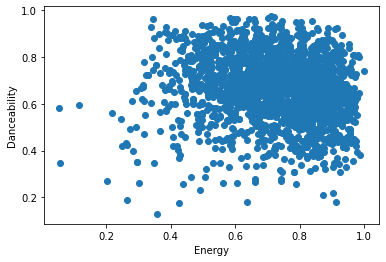

In [17]:
# plot a scatter plot of energy vs danceability
plt.scatter(songs_df["energy"], songs_df["danceability"])

# add labels to the x and y axis
plt.xlabel("Energy")
plt.ylabel("Danceability")

# show the plot
plt.show()

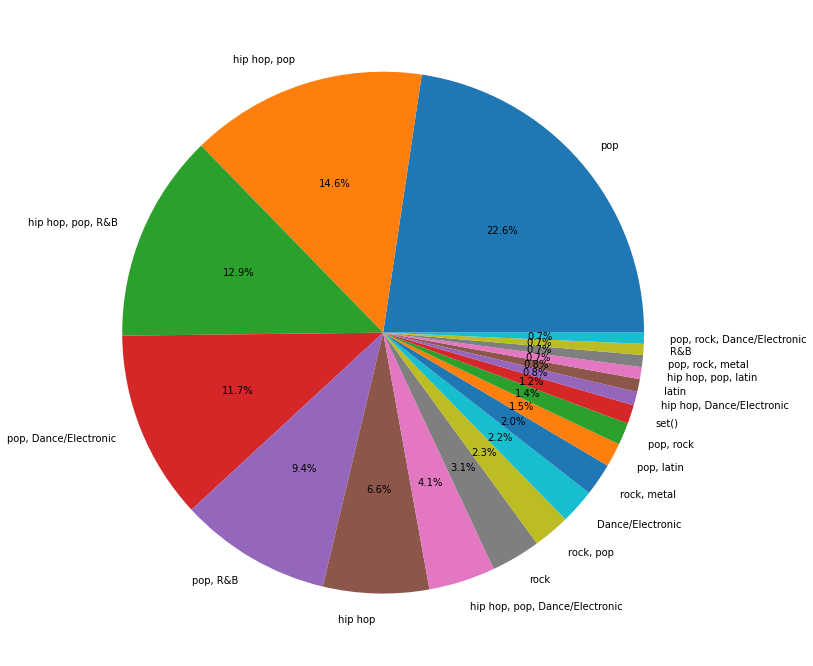

In [18]:
# find the top 20 genres
top_genres = songs_df["genre"].value_counts().head(20)

# plot the pie chart
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%')

# adjust the size of the chart
plt.gcf().set_size_inches(12,12)

# adjust the font size of the labels
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontsize(18)

# show the plot
plt.show()

In [19]:
#find what key was used the most in the top 100 songs
top_100_songs = songs_df.sort_values("popularity", ascending=False).head(100)
key_counts = top_100_songs["key"].value_counts()
most_used_key = key_counts.index[0]
print(f"The most used key in the top 100 songs is: {most_used_key}")


The most used key in the top 100 songs is: 5


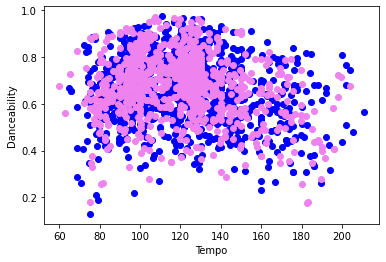

In [20]:
# shows the correlation between tempo and danceability


# filter the songs based on mode (1 = major, 0 = minor)
major_songs = songs_df[songs_df["mode"] == 1]
minor_songs = songs_df[songs_df["mode"] == 0]

# plot the data points with two different colors
plt.scatter(major_songs["tempo"], major_songs["danceability"], c="blue")
plt.scatter(minor_songs["tempo"], minor_songs["danceability"], c="violet")

# set x and y labels
plt.xlabel("Tempo")
plt.ylabel("Danceability")

# show the plot
plt.show()

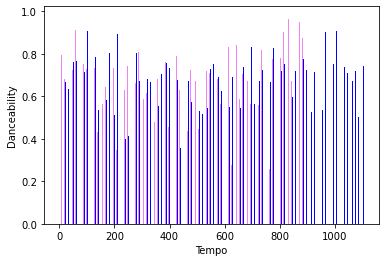

In [35]:
# plot the data points as bar graphs with two different colors
plt.bar(np.arange(len(major_songs["tempo"])), major_songs["danceability"], color="blue", width=0.2)
plt.bar(np.arange(len(minor_songs["tempo"])) + 0.4, minor_songs["danceability"], color="violet", width=0.2)

# set x and y labels
plt.xlabel("Tempo")
plt.ylabel("Danceability")

# Bar graph dimensions
bar_width = 12.00
bar_height = 7.0

# show the plot
plt.show()